# YOLOv9

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jul 23 11:30:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8                4W /  N/A|    959MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!python --version

Python 3.10.0


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

D:\Viren\AIKD\Pedestian


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.6 MB/s eta 0:00:00


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [ ]:
!pip install roboflow

You should consider upgrading via the 'D:\Viren\AIKD\Pedestian\vr\Scripts\python.exe -m pip install --upgrade pip' command.


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-s.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-s.pt

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 160.2ms
Speed: 0.4ms pre-process, 160.2ms inference, 504.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


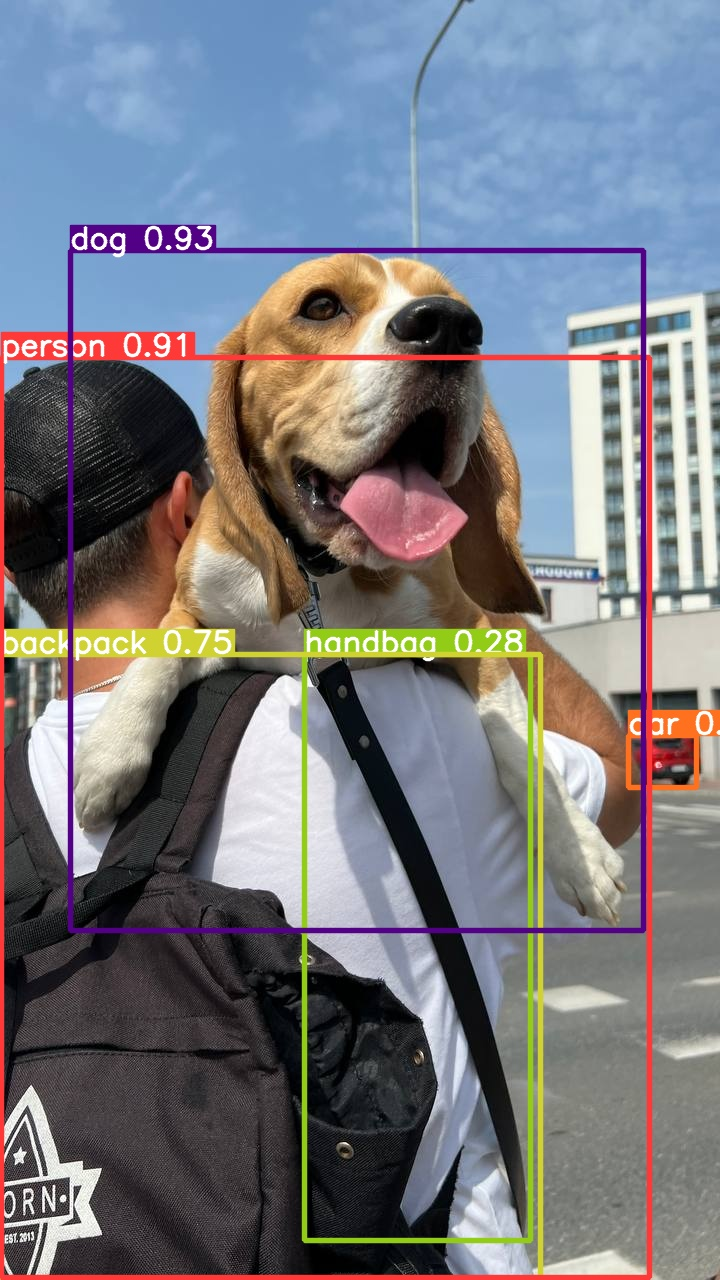

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="eSzt9jqUwL3SzdHp0dmr")
project = rf.workspace("ahmed-stohy").project("kitti-eux6l")
version = project.version(3)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to KITTI-3 in yolov9:: 100%|██████████████████████████████████| 14974/14974 [00:10<00:00, 1368.36it/s]


## Train Custom Model

In [ ]:
!pip install ultralytics

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Viren\\AIKD\\Pedestian\\vr\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.

You should consider upgrading via the 'D:\Viren\AIKD\Pedestian\vr\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 62E5-E029

 Directory of D:\Viren\AIKD\Pedestian

20-07-2024  21:59    <DIR>          .
20-07-2024  21:59    <DIR>          ..
20-07-2024  21:06    <DIR>          .ipynb_checkpoints
20-07-2024  21:59         4,201,389 Copy_of_train_yolov9_object_detection_on_custom_dataset.ipynb
19-07-2024  17:50    <DIR>          datasets
20-07-2024  21:25    <DIR>          KITTI-3
19-07-2024  17:44    <DIR>          rgbt-ped-detection
20-07-2024  21:07    <DIR>          vr
20-07-2024  21:05    <DIR>          yolov9
20-07-2024  21:08        66,462,416 yolov9-m.pt
20-07-2024  21:21         4,969,803 yolov9t.pt
               3 File(s)     75,633,608 bytes
               8 Dir(s)  625,803,976,704 bytes free


In [ ]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch
model = YOLO("yolov9t.yaml")

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9t.pt")

# Display model information (optional)
# model.info()

# Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data={dataset.location}/data.yaml, epochs=100, imgsz=640)

## Added Extra Layers to the Model

![image.png](attachment:6f3715fc-e7fe-4ecb-af03-3285687bbf23.png)

In [ ]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): ELAN1(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=Tru

In [ ]:
# !yolo train model=yolov9.yaml data=coco8.yaml epochs=100 imgsz=640

In [ ]:
# CUDA_LAUNCH_BLOCKING=1
results = model.train(data="D:\Viren\AIKD\Pedestian\KITTI-3\data.yaml", epochs=100, imgsz=128,batch=32,workers=32,classes=2)

New https://pypi.org/project/ultralytics/8.2.63 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.61  Python-3.10.0 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov9t.pt, data=D:\Viren\AIKD\Pedestian\KITTI-3\data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=32, project=None, name=train152, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=2, retina_masks=False, emb

train: Scanning D:\Viren\AIKD\Pedestian\KITTI-3\train\labels.cache... 5237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5237/5237 [00:00<?
val: Scanning D:\Viren\AIKD\Pedestian\KITTI-3\valid\labels.cache... 1496 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1496/1496 [00:00<?, 


Plotting labels to runs\detect\train152\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 4 dataloader workers
Logging results to runs\detect\train152
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.319G      2.104      1.579      1.086          7        128: 100%|██████████| 164/164 [01:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]

                   all       1496        878      0.398      0.245      0.224     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.329G      2.319      1.859      1.115          2        128: 100%|██████████| 164/164 [01:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.76it/s]

                   all       1496        878    0.00723      0.295    0.00451    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.331G      2.367      1.927      1.143          2        128: 100%|██████████| 164/164 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.72it/s]

                   all       1496        878      0.168      0.233     0.0659     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.329G      2.428      1.966      1.156         37        128: 100%|██████████| 164/164 [01:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


                   all       1496        878      0.113      0.218     0.0422     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.329G      2.391      1.984      1.139          7        128: 100%|██████████| 164/164 [01:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all       1496        878      0.111        0.2     0.0346     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.331G       2.41      1.892      1.144          0        128: 100%|██████████| 164/164 [01:26<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.12it/s]

                   all       1496        878      0.168      0.211     0.0548     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.331G      2.353      1.888      1.142         12        128: 100%|██████████| 164/164 [01:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.12it/s]

                   all       1496        878      0.429      0.169      0.168     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.329G      2.284      1.848      1.133          7        128: 100%|██████████| 164/164 [01:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]

                   all       1496        878       0.32      0.183      0.135     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.331G      2.354      1.839      1.136          3        128: 100%|██████████| 164/164 [01:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]

                   all       1496        878      0.349      0.229      0.185     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.329G      2.294      1.786      1.131          5        128: 100%|██████████| 164/164 [01:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.37it/s]

                   all       1496        878      0.418      0.237      0.232     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.329G      2.276      1.757      1.107          1        128: 100%|██████████| 164/164 [02:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.58it/s]

                   all       1496        878      0.397      0.238       0.22      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.329G      2.208      1.633      1.092          4        128: 100%|██████████| 164/164 [01:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all       1496        878      0.388      0.251      0.228      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.329G      2.246      1.706      1.084          1        128: 100%|██████████| 164/164 [01:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.52it/s]

                   all       1496        878      0.429       0.26      0.232      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.329G      2.178      1.706      1.073         17        128: 100%|██████████| 164/164 [01:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.27it/s]

                   all       1496        878      0.409      0.263      0.247      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.329G      2.216      1.657      1.079          3        128: 100%|██████████| 164/164 [01:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.38it/s]


                   all       1496        878       0.46      0.257      0.259      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.331G      2.213       1.67      1.089         17        128: 100%|██████████| 164/164 [01:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.60it/s]

                   all       1496        878      0.431      0.212       0.21     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.331G      2.131      1.636      1.066         20        128: 100%|██████████| 164/164 [01:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.58it/s]

                   all       1496        878      0.416      0.262      0.245      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.329G      2.115      1.607      1.074          9        128: 100%|██████████| 164/164 [01:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.75it/s]

                   all       1496        878      0.403      0.252      0.236      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.329G      2.144      1.642      1.075          7        128: 100%|██████████| 164/164 [01:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.65it/s]

                   all       1496        878      0.406      0.257      0.234     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.329G       2.16      1.618      1.063          9        128: 100%|██████████| 164/164 [01:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.68it/s]

                   all       1496        878      0.401      0.267      0.244      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.331G       2.12      1.625      1.079          2        128: 100%|██████████| 164/164 [01:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.40it/s]

                   all       1496        878      0.412      0.232      0.223      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.331G      2.117      1.555      1.075         14        128: 100%|██████████| 164/164 [01:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.57it/s]

                   all       1496        878      0.464      0.286      0.273      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.331G      2.083      1.526      1.048          4        128: 100%|██████████| 164/164 [01:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.80it/s]

                   all       1496        878      0.451      0.272      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.329G      2.077      1.553      1.052         12        128: 100%|██████████| 164/164 [01:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all       1496        878      0.491       0.26      0.274      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.329G      2.108      1.509      1.052         18        128: 100%|██████████| 164/164 [01:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.65it/s]

                   all       1496        878      0.497      0.272      0.271       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.329G      2.078      1.508      1.049         23        128: 100%|██████████| 164/164 [01:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all       1496        878      0.442      0.253      0.242      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.329G      2.141      1.554      1.068          1        128: 100%|██████████| 164/164 [01:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.79it/s]

                   all       1496        878       0.43      0.267      0.239      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.329G      2.065      1.469      1.044          7        128: 100%|██████████| 164/164 [01:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]

                   all       1496        878      0.387      0.276      0.265      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.329G      2.048      1.478      1.035          9        128: 100%|██████████| 164/164 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.76it/s]

                   all       1496        878      0.508      0.265      0.284      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.331G      2.059      1.523      1.023         10        128: 100%|██████████| 164/164 [01:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.56it/s]

                   all       1496        878      0.429      0.294      0.261      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.329G      1.999      1.445      1.035          4        128: 100%|██████████| 164/164 [01:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.80it/s]

                   all       1496        878      0.428      0.285      0.273      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.329G      2.017      1.442      1.028          3        128: 100%|██████████| 164/164 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.68it/s]

                   all       1496        878      0.457      0.281      0.272      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.329G      2.013      1.468      1.029          4        128: 100%|██████████| 164/164 [01:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]


                   all       1496        878      0.438       0.31      0.284      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.329G      1.983      1.417      1.027         16        128: 100%|██████████| 164/164 [01:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.96it/s]

                   all       1496        878       0.55      0.269      0.291      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.329G      1.966      1.451      1.013          6        128: 100%|██████████| 164/164 [01:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.39it/s]

                   all       1496        878      0.436      0.306      0.297      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.329G      1.992       1.42      1.026          9        128: 100%|██████████| 164/164 [01:09<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.57it/s]

                   all       1496        878      0.444      0.299      0.263      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.329G       1.98      1.407      1.009         13        128: 100%|██████████| 164/164 [01:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.18it/s]

                   all       1496        878      0.542      0.268       0.29      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.329G      1.994      1.399      1.011          5        128: 100%|██████████| 164/164 [01:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]

                   all       1496        878      0.549      0.278        0.3      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.329G       1.98       1.37      1.025         10        128: 100%|██████████| 164/164 [01:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.54it/s]

                   all       1496        878      0.517      0.284      0.299       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.329G      1.946      1.349      1.011         11        128: 100%|██████████| 164/164 [01:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.74it/s]

                   all       1496        878      0.507      0.294      0.303      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.329G      1.941      1.327      1.019         32        128: 100%|██████████| 164/164 [01:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.52it/s]

                   all       1496        878      0.515      0.286      0.307      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.329G       1.91       1.32      1.003          6        128: 100%|██████████| 164/164 [01:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]

                   all       1496        878      0.489      0.294      0.308       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.329G      1.936      1.325     0.9948         24        128: 100%|██████████| 164/164 [01:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.67it/s]

                   all       1496        878      0.502      0.301      0.301      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.329G      1.921      1.367      1.018          2        128: 100%|██████████| 164/164 [01:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.56it/s]

                   all       1496        878      0.485      0.289      0.296       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.329G      1.903      1.328     0.9951         14        128: 100%|██████████| 164/164 [01:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]

                   all       1496        878      0.529      0.304      0.309      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.329G      1.874      1.284      1.002         18        128: 100%|██████████| 164/164 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.74it/s]

                   all       1496        878      0.476      0.322      0.318      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.329G      1.918      1.325      1.007         10        128: 100%|██████████| 164/164 [01:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.91it/s]

                   all       1496        878      0.503      0.297      0.318      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.329G      1.848      1.301     0.9853          3        128: 100%|██████████| 164/164 [01:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.94it/s]

                   all       1496        878      0.489      0.313      0.321      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.329G      1.894      1.297     0.9806          3        128: 100%|██████████| 164/164 [00:59<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.02it/s]

                   all       1496        878      0.475      0.315      0.322      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.329G        1.9      1.311      1.004         13        128: 100%|██████████| 164/164 [01:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.80it/s]

                   all       1496        878      0.518      0.287      0.313      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.329G      1.908      1.278      1.001          3        128: 100%|██████████| 164/164 [01:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.91it/s]

                   all       1496        878      0.496      0.305      0.324      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.329G      1.861      1.278     0.9818          8        128: 100%|██████████| 164/164 [01:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.77it/s]

                   all       1496        878      0.485      0.333       0.34      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.329G      1.878      1.276     0.9852         20        128: 100%|██████████| 164/164 [01:07<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]

                   all       1496        878      0.502      0.308      0.326      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.329G      1.835      1.269     0.9835         12        128: 100%|██████████| 164/164 [01:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.92it/s]

                   all       1496        878      0.501       0.31       0.33      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.329G      1.827      1.239     0.9788         10        128: 100%|██████████| 164/164 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.76it/s]

                   all       1496        878      0.542      0.308      0.338      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.329G      1.865      1.219     0.9753         19        128: 100%|██████████| 164/164 [01:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.58it/s]

                   all       1496        878      0.476      0.323      0.329       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.329G      1.849      1.291          1          5        128: 100%|██████████| 164/164 [01:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.90it/s]

                   all       1496        878      0.507      0.305       0.33      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.329G      1.817      1.232     0.9765          8        128: 100%|██████████| 164/164 [01:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.69it/s]

                   all       1496        878      0.526      0.335      0.344       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.329G      1.835       1.22     0.9875         23        128: 100%|██████████| 164/164 [00:58<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.33it/s]

                   all       1496        878      0.578      0.306      0.349      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.329G      1.782      1.236     0.9652         25        128: 100%|██████████| 164/164 [00:57<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]

                   all       1496        878      0.536      0.333      0.351      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.329G      1.797      1.236     0.9712         10        128: 100%|██████████| 164/164 [00:56<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.23it/s]

                   all       1496        878       0.48      0.341      0.339      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.329G      1.814      1.275     0.9719          7        128: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

                   all       1496        878      0.565      0.308      0.348      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.329G      1.777      1.206     0.9713         27        128: 100%|██████████| 164/164 [00:56<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]

                   all       1496        878      0.491      0.334      0.342      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.329G      1.864      1.219      0.969          7        128: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]

                   all       1496        878      0.527      0.326       0.35      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.329G        1.8      1.195     0.9679          4        128: 100%|██████████| 164/164 [00:56<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.21it/s]

                   all       1496        878      0.495      0.339      0.345      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.329G      1.812       1.21     0.9809         20        128: 100%|██████████| 164/164 [00:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.21it/s]

                   all       1496        878      0.511      0.328      0.349       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.329G      1.736      1.184     0.9628         14        128: 100%|██████████| 164/164 [00:58<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.13it/s]

                   all       1496        878      0.549      0.326      0.354      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.329G      1.768      1.172     0.9613          6        128: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]

                   all       1496        878      0.501      0.343      0.359      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.329G      1.768      1.171     0.9664         14        128: 100%|██████████| 164/164 [00:56<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.15it/s]

                   all       1496        878        0.5      0.331      0.352      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.329G      1.733       1.16     0.9603         12        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.72it/s]

                   all       1496        878       0.54      0.319      0.355       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.329G      1.766      1.203     0.9708          6        128: 100%|██████████| 164/164 [01:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.94it/s]

                   all       1496        878      0.508      0.334      0.354      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.329G      1.751      1.145     0.9697         14        128: 100%|██████████| 164/164 [01:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.98it/s]

                   all       1496        878        0.5      0.346       0.36      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.329G      1.734      1.155     0.9452          3        128: 100%|██████████| 164/164 [00:59<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.41it/s]

                   all       1496        878      0.526      0.331      0.361      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.329G      1.775      1.161     0.9585         16        128: 100%|██████████| 164/164 [00:56<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.20it/s]

                   all       1496        878      0.557      0.327      0.357      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.329G      1.704      1.107     0.9529          9        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.40it/s]

                   all       1496        878      0.536      0.335       0.36       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.327G      1.705      1.128      0.945         22        128: 100%|██████████| 164/164 [00:57<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]

                   all       1496        878      0.528      0.323      0.361      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.329G      1.733      1.158     0.9523          5        128: 100%|██████████| 164/164 [00:57<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.96it/s]

                   all       1496        878      0.621      0.302      0.361       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.329G      1.749      1.137     0.9625         22        128: 100%|██████████| 164/164 [00:56<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.23it/s]

                   all       1496        878      0.485      0.342      0.359      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.329G      1.666       1.12     0.9355          1        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.49it/s]

                   all       1496        878      0.501      0.347      0.366      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.329G      1.705      1.195     0.9339          2        128: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.37it/s]

                   all       1496        878      0.494      0.359      0.365      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.329G       1.71      1.107     0.9524          8        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.39it/s]

                   all       1496        878      0.509      0.355      0.372      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.329G      1.686      1.065     0.9443         13        128: 100%|██████████| 164/164 [00:59<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]

                   all       1496        878      0.481      0.354      0.368      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.329G      1.677      1.095     0.9427         10        128: 100%|██████████| 164/164 [01:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.15it/s]

                   all       1496        878      0.464      0.361      0.368      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.329G      1.691      1.097     0.9444          6        128: 100%|██████████| 164/164 [00:58<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.21it/s]

                   all       1496        878      0.487      0.363      0.373      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.329G      1.676       1.08     0.9528         18        128: 100%|██████████| 164/164 [00:54<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]

                   all       1496        878      0.505      0.356      0.363      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.329G       1.63      1.079     0.9189         14        128: 100%|██████████| 164/164 [00:58<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]

                   all       1496        878      0.512      0.347      0.364      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.329G      1.679      1.149     0.9416          5        128: 100%|██████████| 164/164 [00:53<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.05it/s]

                   all       1496        878      0.512      0.358      0.373      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.329G      1.639      1.065     0.9343          5        128: 100%|██████████| 164/164 [01:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]

                   all       1496        878       0.51       0.36      0.371      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.329G      1.601      1.024     0.9243         14        128: 100%|██████████| 164/164 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.14it/s]

                   all       1496        878      0.506      0.346      0.367       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.329G      1.663      1.053     0.9409         16        128: 100%|██████████| 164/164 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.85it/s]

                   all       1496        878      0.547      0.338      0.371      0.188


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.329G       1.67      1.099     0.9338         18        128: 100%|██████████| 164/164 [00:57<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]

                   all       1496        878      0.504      0.363      0.374       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.329G      1.641      1.018     0.9238          1        128: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.45it/s]

                   all       1496        878      0.547      0.344      0.374       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.329G      1.663      1.044     0.9301          9        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.44it/s]

                   all       1496        878      0.545      0.344      0.375      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.329G      1.593      1.033      0.928          0        128: 100%|██████████| 164/164 [01:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]

                   all       1496        878      0.537      0.349      0.373      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.329G      1.645       1.04     0.9359         19        128: 100%|██████████| 164/164 [01:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.75it/s]

                   all       1496        878      0.536      0.344      0.373      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.329G      1.635      1.067      0.926         17        128: 100%|██████████| 164/164 [01:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]

                   all       1496        878      0.526      0.345      0.371      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.329G      1.634      1.062     0.9438          3        128: 100%|██████████| 164/164 [00:58<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.37it/s]

                   all       1496        878       0.49       0.37      0.377       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.329G      1.608      1.034     0.9303          2        128: 100%|██████████| 164/164 [00:56<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.43it/s]

                   all       1496        878      0.495      0.367      0.375      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.329G      1.635      1.034     0.9318          8        128: 100%|██████████| 164/164 [00:56<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.42it/s]

                   all       1496        878      0.494      0.371      0.375      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.329G      1.572      1.006     0.9168          3        128: 100%|██████████| 164/164 [00:56<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]

                   all       1496        878      0.523      0.353      0.375      0.193



100 epochs completed in 2.024 hours.
Optimizer stripped from runs\detect\train152\weights\last.pt, 4.6MB
Optimizer stripped from runs\detect\train152\weights\best.pt, 4.6MB

Validating runs\detect\train152\weights\best.pt...
Ultralytics YOLOv8.2.61  Python-3.10.0 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1060, 6144MiB)
YOLOv9t summary (fused): 486 layers, 1,971,369 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]


                   all       1496        878      0.523      0.353      0.376      0.193
            Pedestrian        355        878      0.523      0.353      0.376      0.193
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train152


In [ ]:
# %cd {HOME}/yolov9

# !python train.py \
# --batch 16 --epochs 75 --img 125 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/yolov9-m.pt \
# --cfg models/detect/yolov9-c.yaml \
# --hyp hyp.scratch-high.yaml

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

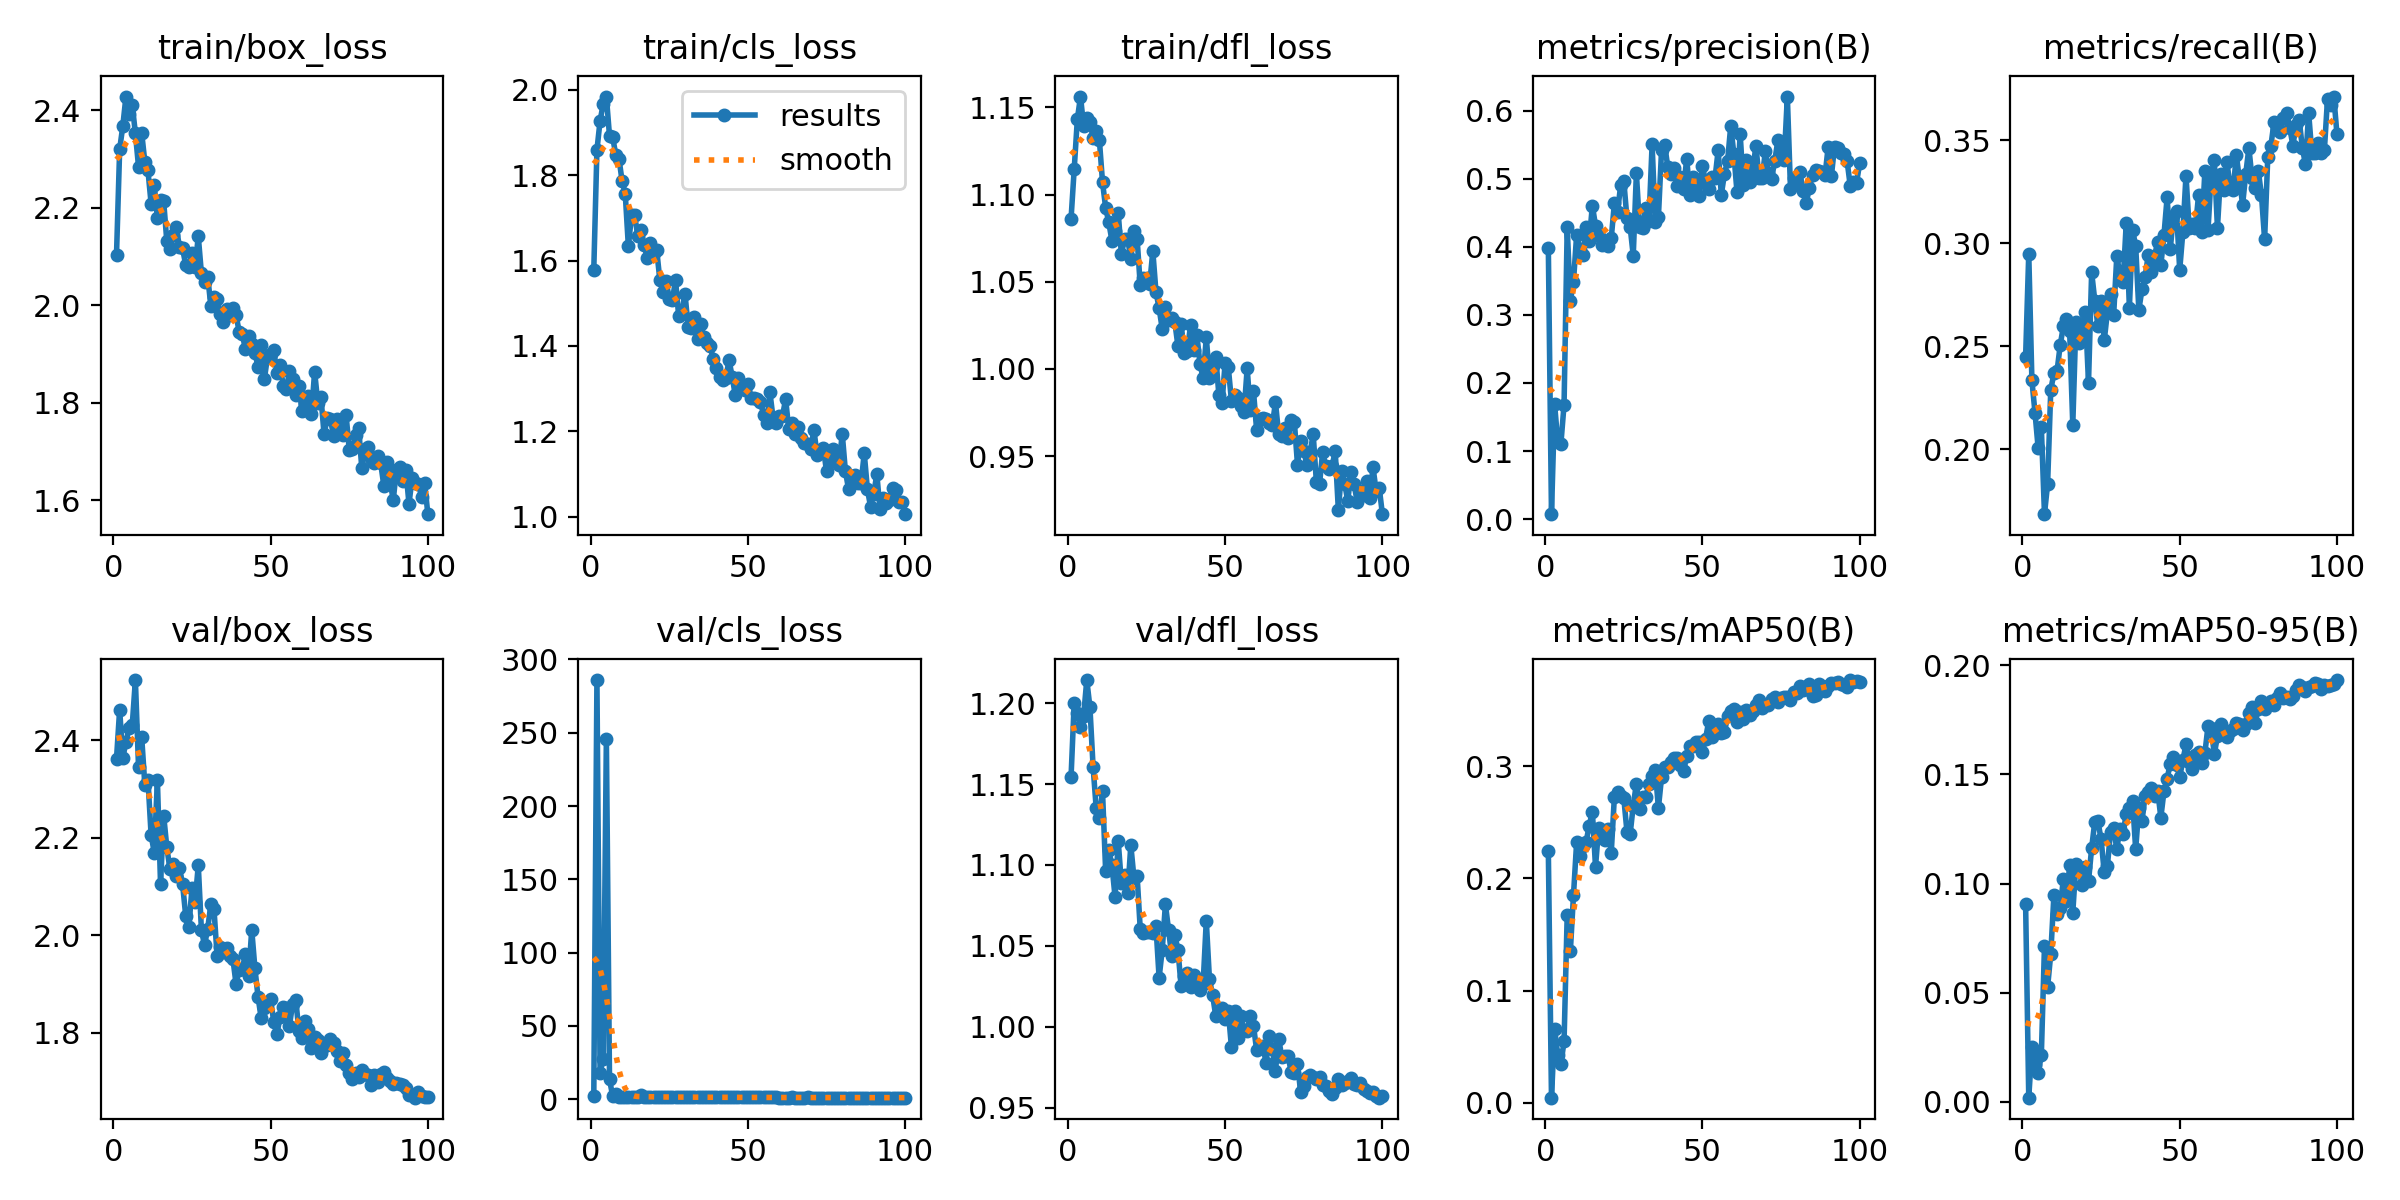

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/train152/results.png", width=1000)

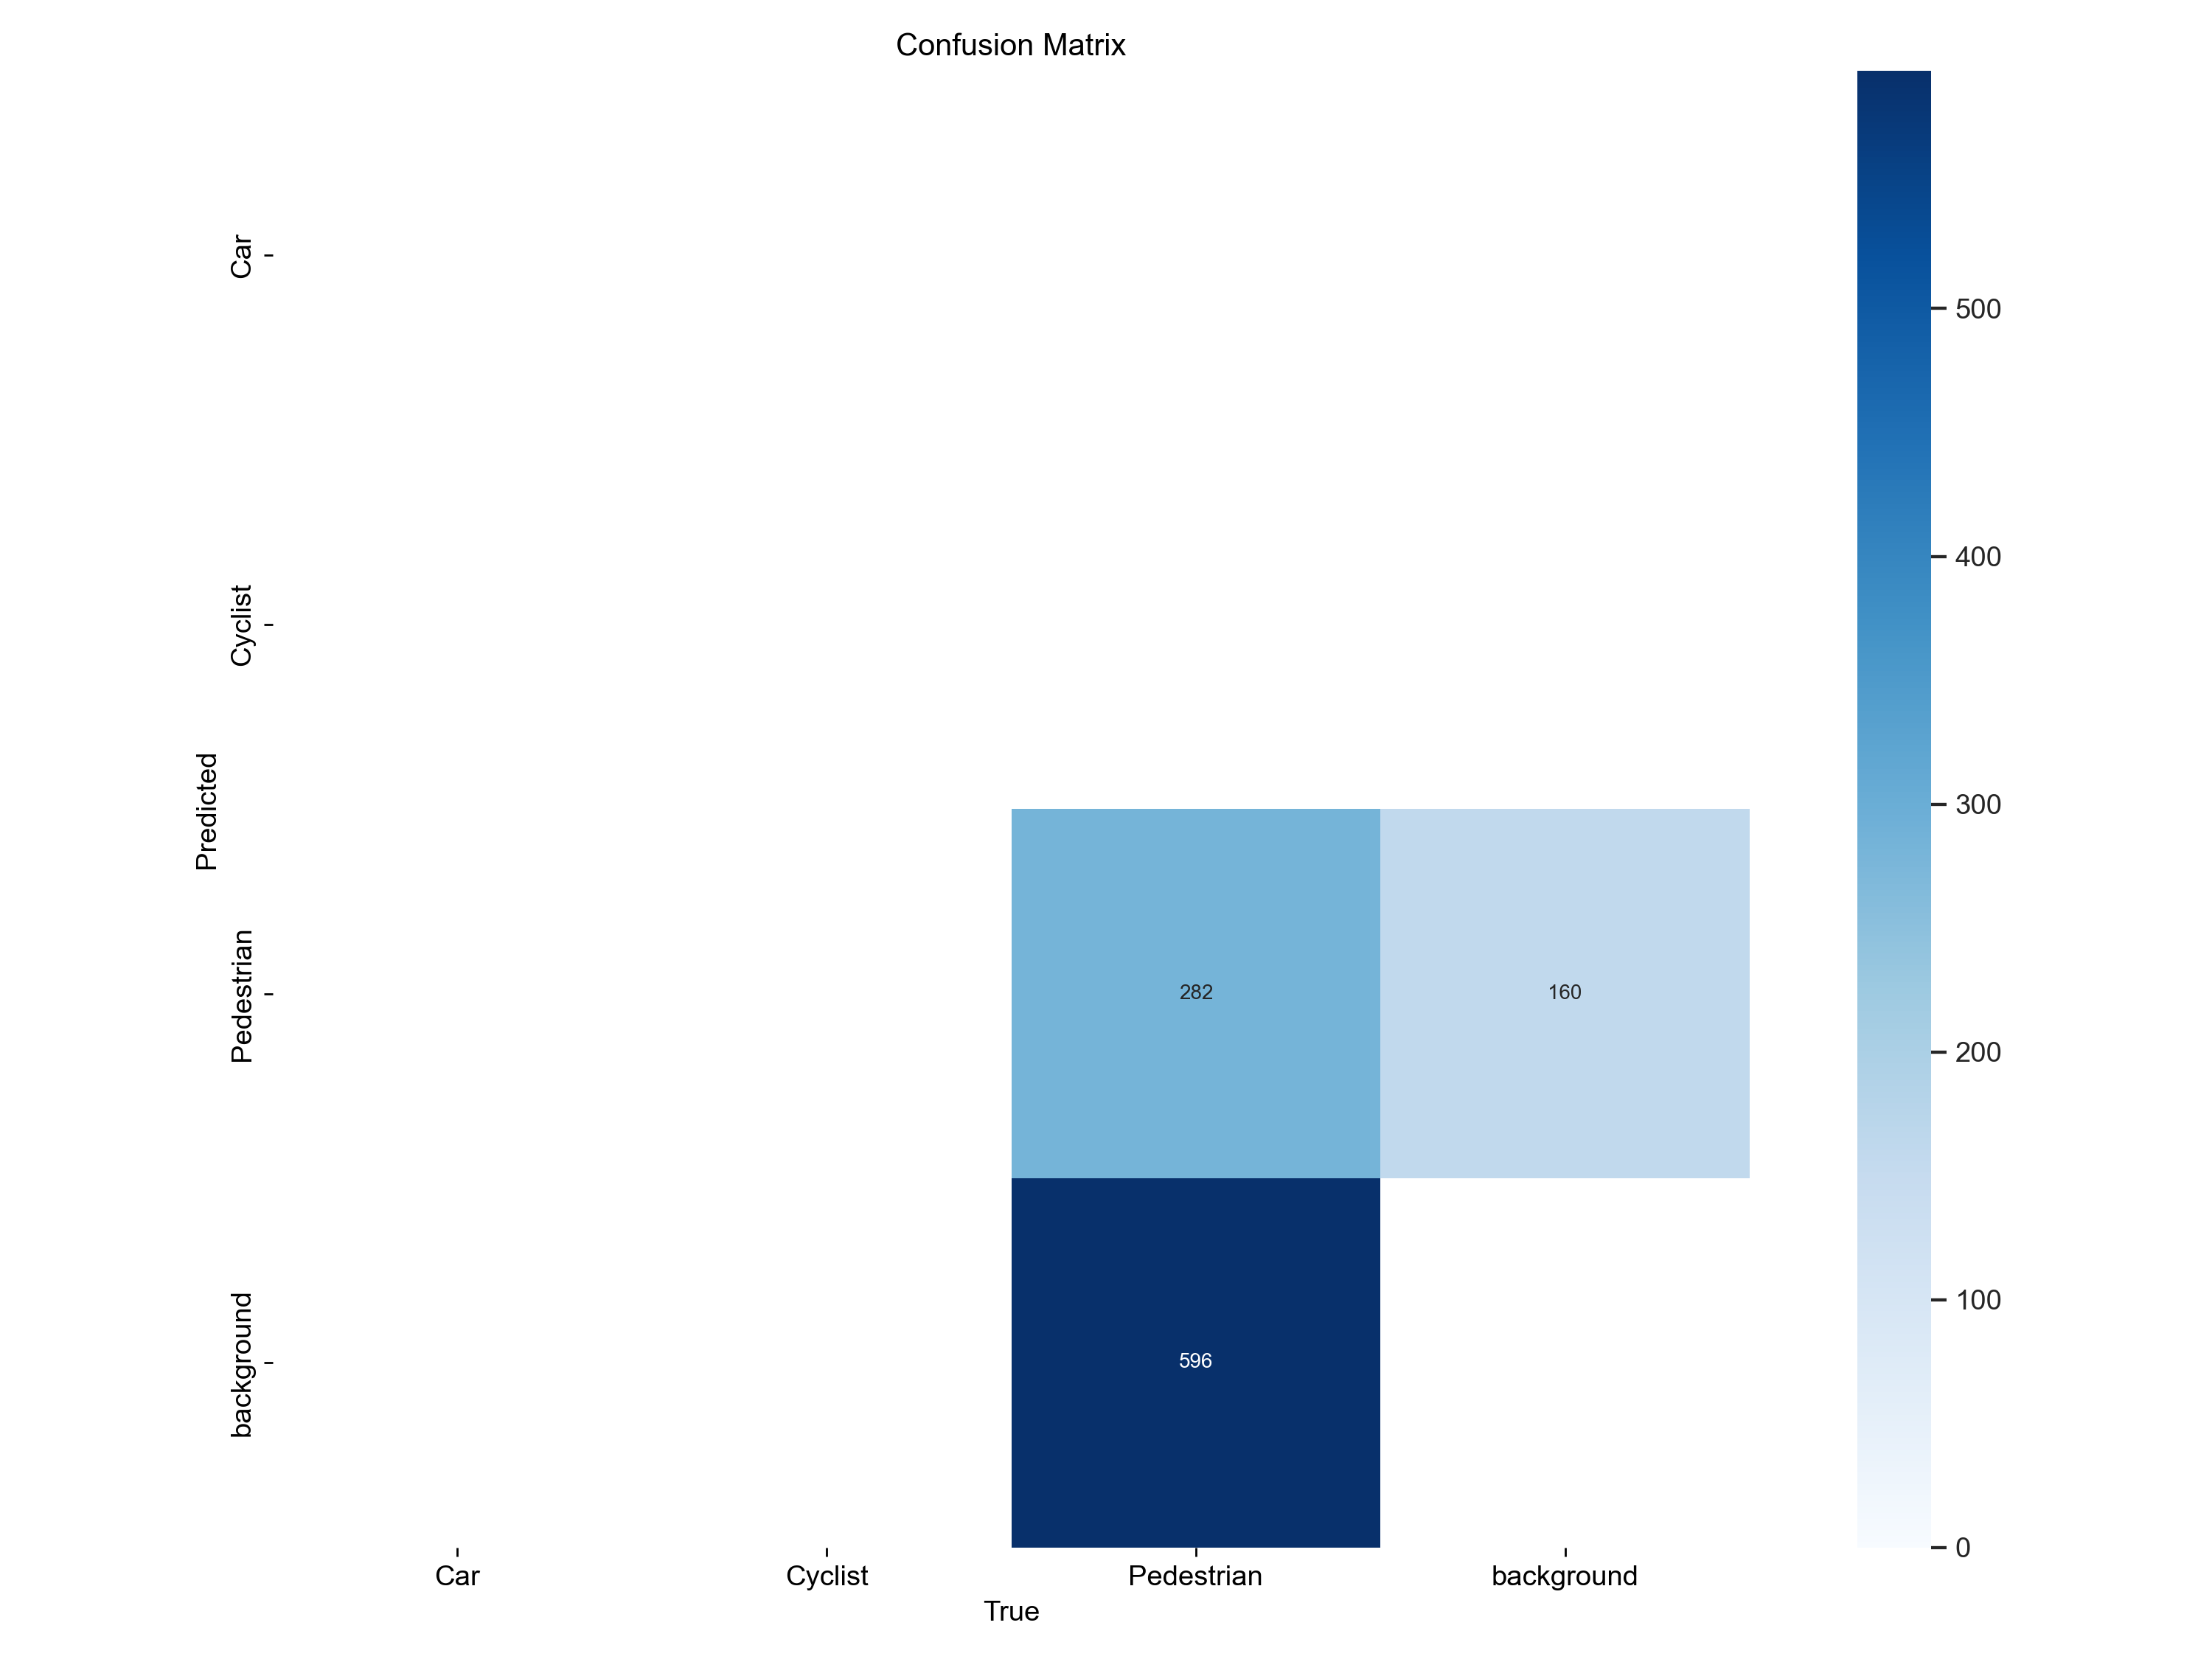

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/train152/confusion_matrix.png", width=1000)

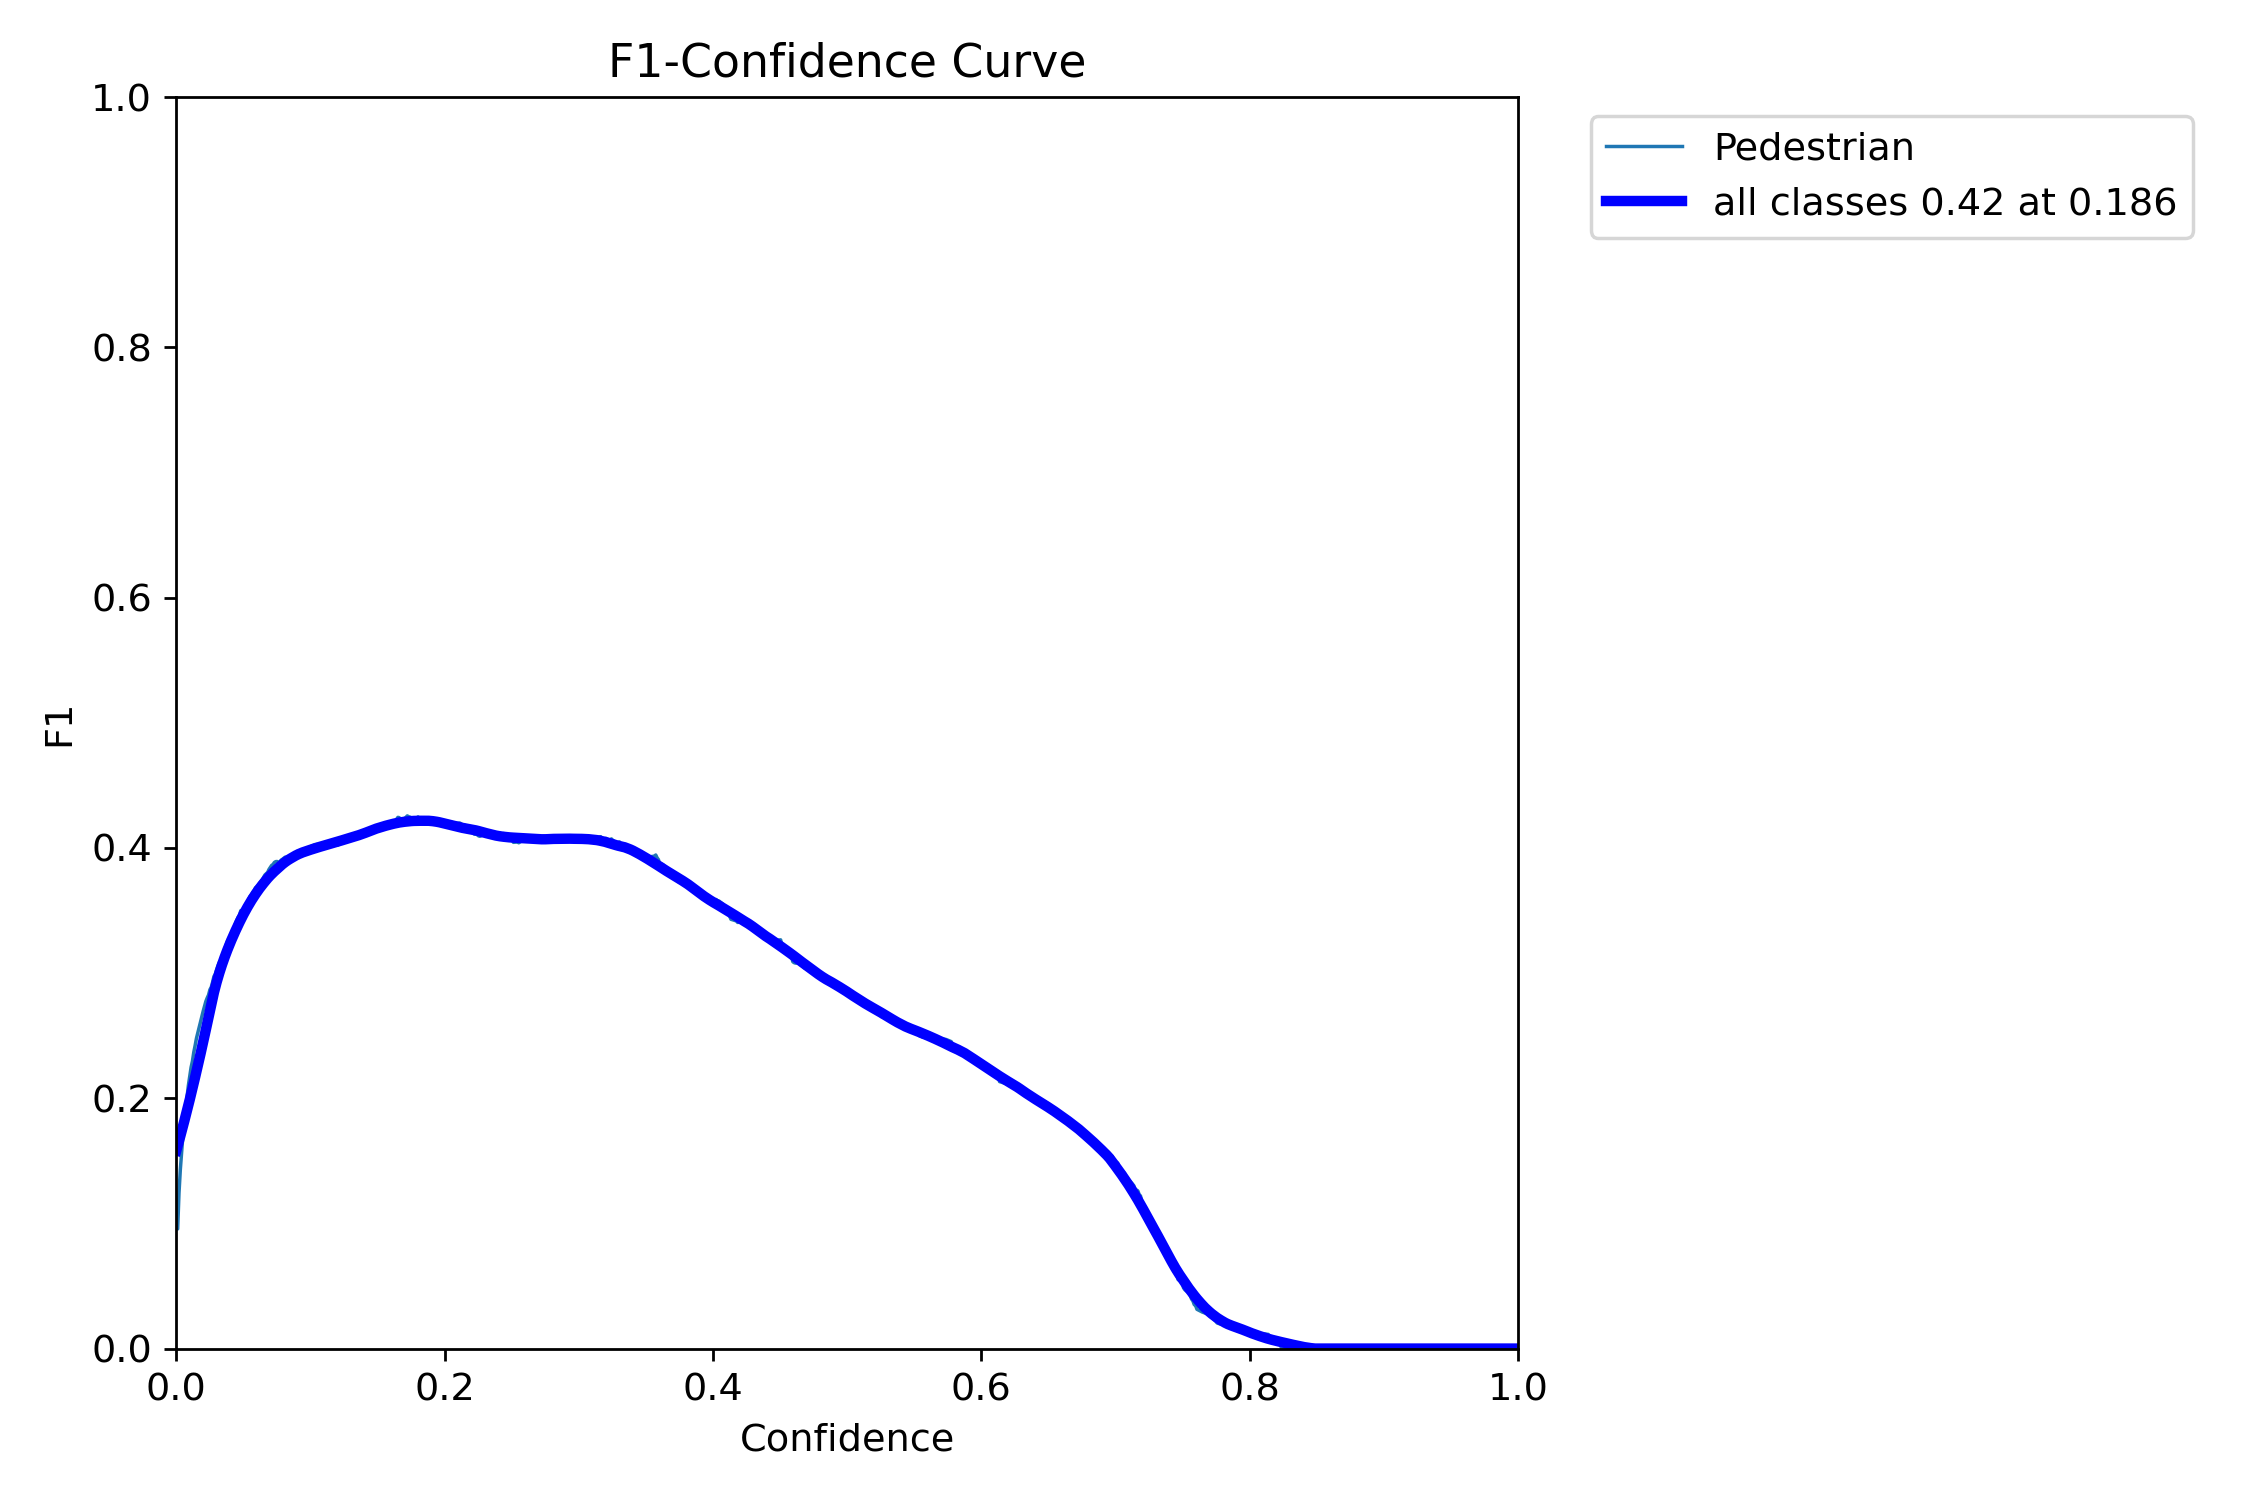

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/train152/F1_curve.png", width=1000)

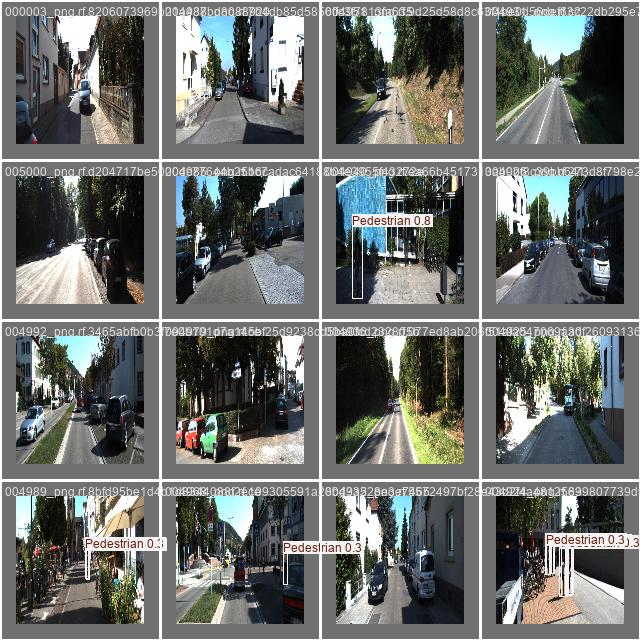

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/train152/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO(f"runs\\detect\\train152\\weights\\best.pt")

# # Validate on your test dataset by specifying the path to your test data YAML
# results = model.val(data='path/to/test_data.yaml')

In [ ]:
results = model.val()

Ultralytics YOLOv8.2.61  Python-3.10.0 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1060, 6144MiB)
YOLOv9t summary (fused): 486 layers, 1,971,369 parameters, 0 gradients, 7.6 GFLOPs


val: Scanning D:\Viren\AIKD\Pedestian\KITTI-3\valid\labels.cache... 1496 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1496/1496 [00:00<?, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:12<00:00,  7.38it/s]


                   all       1496       8040      0.176      0.117      0.126     0.0646
                   Car       1368       6830          0          0          0          0
               Cyclist        235        332          0          0          0          0
            Pedestrian        355        878      0.529      0.352      0.379      0.194
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val3


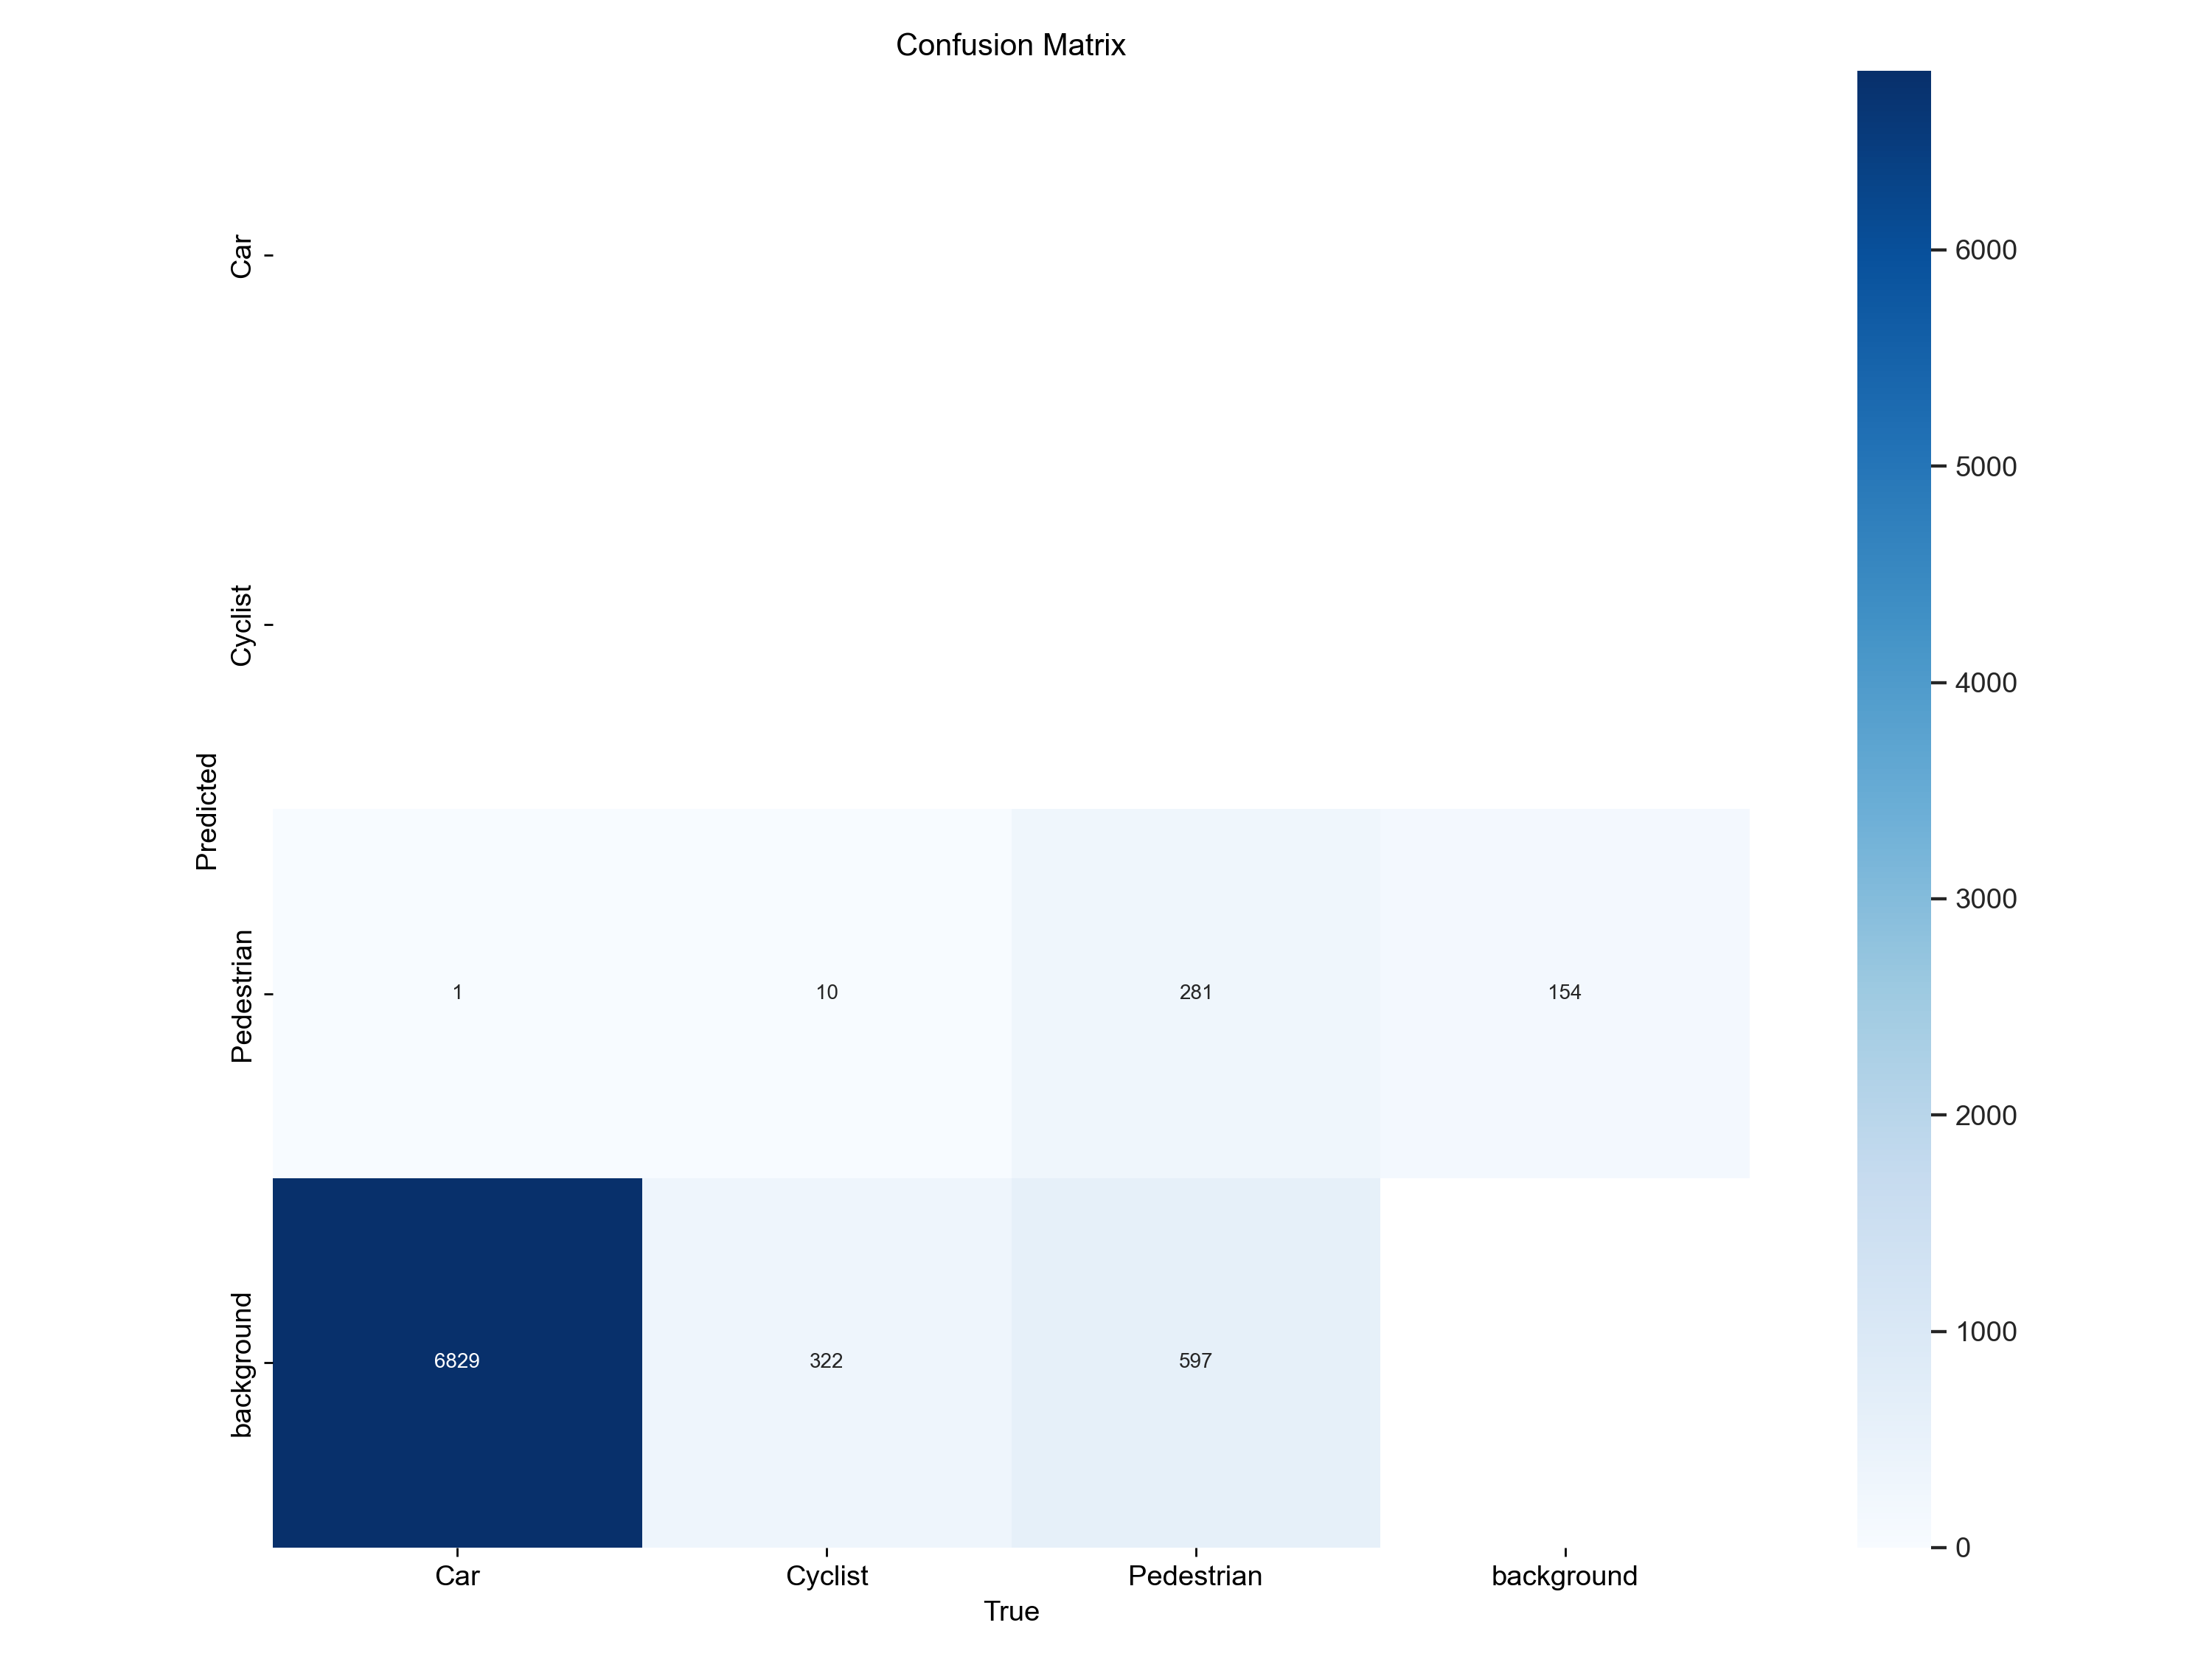

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/val3/confusion_matrix.png", width=1000)

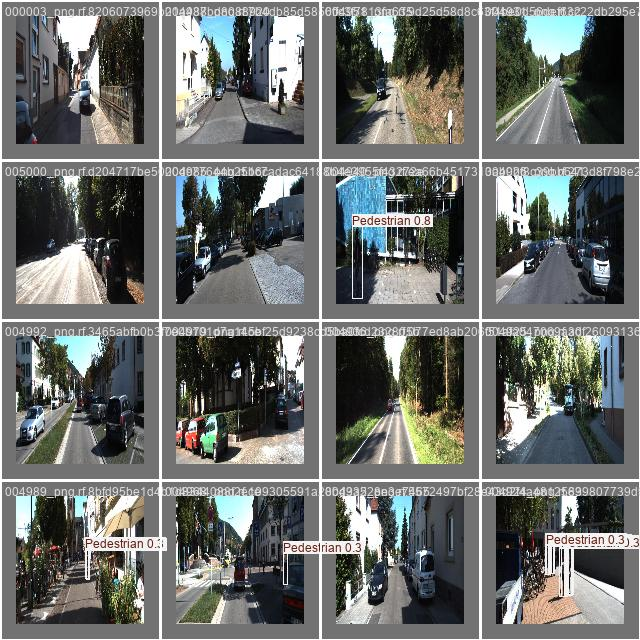

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/val3/val_batch0_pred.jpg", width=1000)

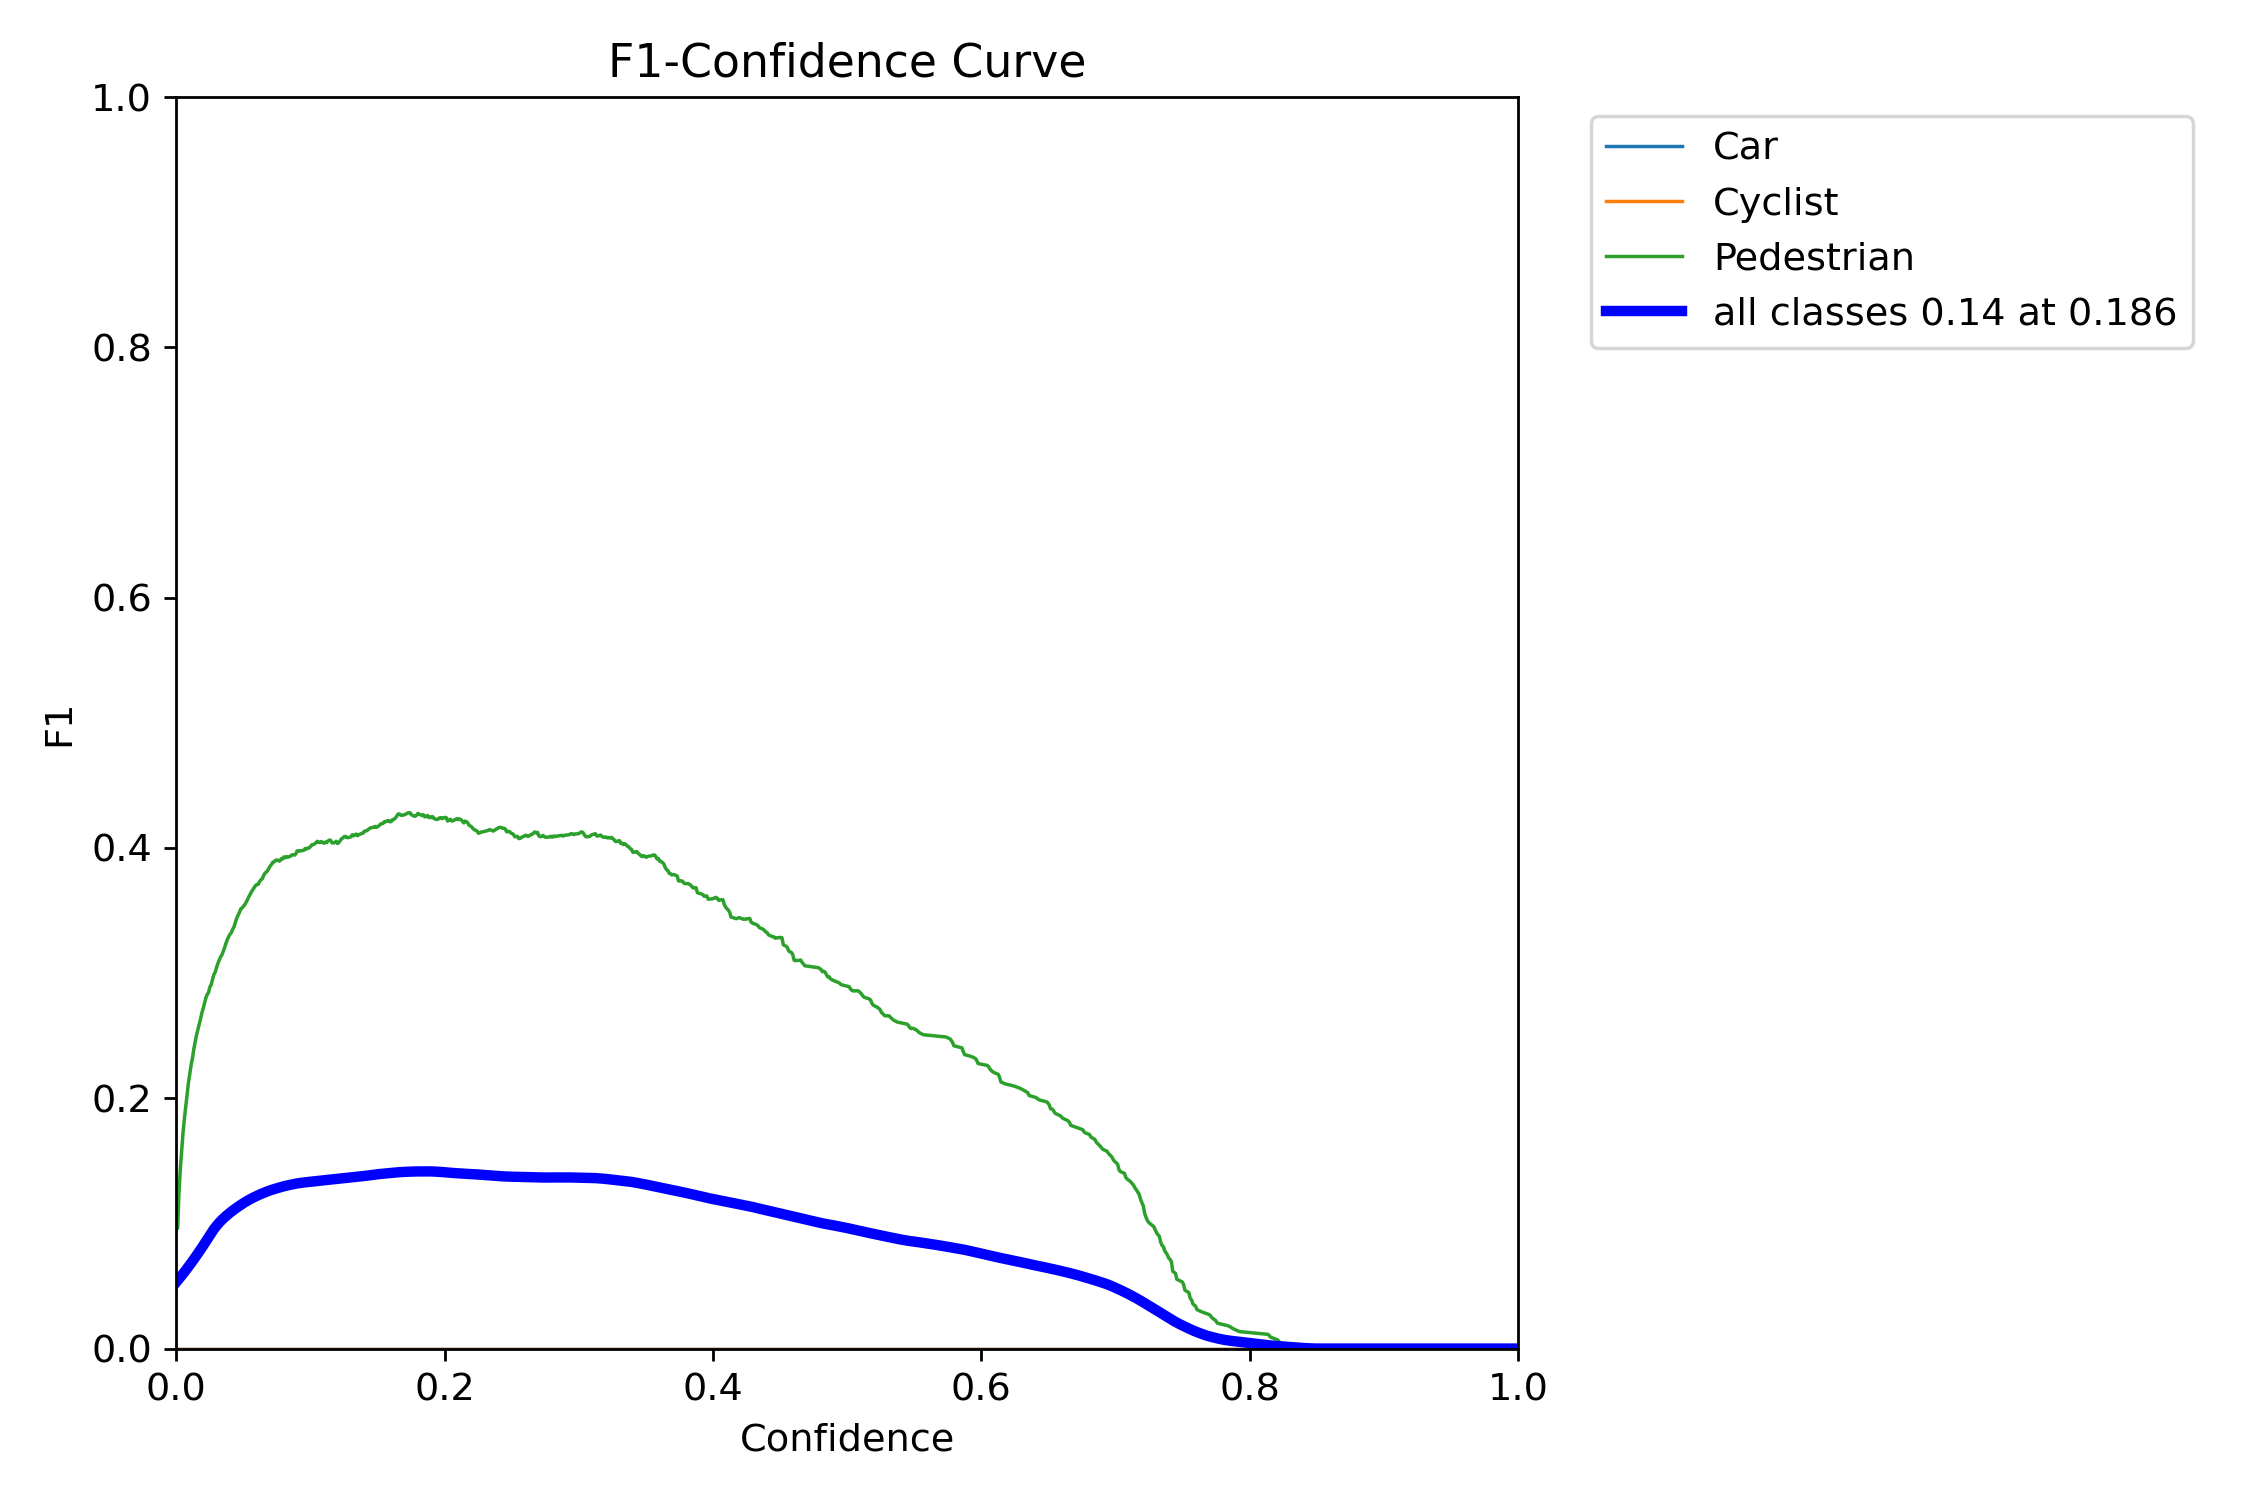

In [ ]:
from IPython.display import Image

Image(filename=f"runs/detect/val3/F1_curve.png", width=1000)

In [ ]:
# %cd {HOME}/yolov9

# !python val.py \
# --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/yolov9/runs/train/exp/weights/best.pt

## Inference with Custom Model

In [ ]:
# !python detect.py \
# --img 1280 --conf 0.1 --device 0 \
# --weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
# --source {dataset.location}/test/images

In [ ]:
source = f"KITTI-3//test/images"
from ultralytics import YOLO

# Load your trained model
model = YOLO(f"runs\\detect\\train152\\weights\\best.pt")
# Run inference on the source
results = model(source,save=True)


image 1/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000000_png.rf.23124ef290a650f035d6ef8c48070803.jpg: 128x128 1 Pedestrian, 46.9ms
image 2/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000006_png.rf.03327ccd955aa70d276bcd35fa9c66b5.jpg: 128x128 (no detections), 61.3ms
image 3/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000012_png.rf.e257807330c4bd5cb4300e6d67779f99.jpg: 128x128 (no detections), 50.5ms
image 4/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000019_png.rf.5a26dfa7f82c32cea671c9679f784284.jpg: 128x128 (no detections), 23.7ms
image 5/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000024_png.rf.9adbf2e15a5c3049fd3a11103f90a417.jpg: 128x128 (no detections), 35.0ms
image 6/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000033_png.rf.d222ba0ce287a1cb085c6102ce303698.jpg: 128x128 (no detections), 58.1ms
image 7/748 D:\Viren\AIKD\Pedestian\KITTI-3\test\images\000034_png.rf.e50529c8bb4bc0d63da1fcdb60042c09.jpg: 128x128 (no detections), 59.2ms
image 8/748 D:\Viren\A

In [ ]:
# for result in results:
#     print(result)
#     # boxes = result.boxes  # Boxes object for bounding box outputs
#     # masks = result.masks  # Masks object for segmentation masks outputs
#     # keypoints = result.keypoints  # Keypoints object for pose outputs
#     # probs = result.probs  # Probs object for classification outputs
#     # obb = result.obb
#     display(Image(result, save=600))# Oriented boxes object for OBB outputs
#     # # result.show()